# 직원 이탈 요인 분석 프로젝트

## (1) 프로젝트 개요

#### 데이터 출처
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

#### Feature 구성

- Age: 나이
- Attrition: 퇴직 여부
- BusinessTravel: 출장 빈도
- DailyRate: 일일 급여 수준
- Department: 소속부서
- DistanceFromHome: 출퇴근거리
- Education: 교육수준
- EducationField: 전공
- EmployeeCount: 직원 숫자
- EmployeeNumber: 직원 ID
- EnvironmentSatisfaction: 근무환경 만족도
- Gender: 성별
- HourlyRate: 시급수준
- JobInvolvement: 업무참여도
- JobLevel: 업무수준
- JobRole: 직책
- JobSatisfaction: 업무 만족도
- MaritalStatus: 결혼여부
- MonthlyIncome: 월 소득액수
- MonthlyRate: 월 소득 수준
- NumCompaniesWorked: 지금까지 일했던 회사의 수
- Over18: 18세 이상
- Overtime: 초과근무여부
- PercentSalaryHike: 임금상승률
- PerformanceRating: 업무 평가 수준
- RelationshipSatisfaction: 대인관계 만족도
- StandardHours: 표준 시간
- StockOptionLevel: 스톡옵션 수준
- TotalWorkingYear: 경력 기간
- TrainingTimesLastYear: 지난해 교육 시간
- WorkLifeBalance: 일과 생활의 균형
- YearsAtCompany: 근속연수
- YearsInCurrentRole: 현재 업무 근로 기간
- YearsSinceLastPromotion: 마지막으로 승진한 연도
- YearsWithCurrManager: 현재 부서장과의 협업 기간


## (2) EDA 및 데이터 전처리

### 2-1. 데이터 불러오기

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0


### 2-2. 데이터 탐색

In [ ]:
df.shape

(1470, 35)

### 2-3. 데이터 전처리

#### 결측값 처리

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### 중복값 처리

In [ ]:
df.duplicated().sum()

0

### 2-4. Target Feature 정의

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [ ]:
# 예측대상 데이터인 'Attrition'컬럼의 데이터가 'Yes'와 'No'로 표기되어 있으므로, 문자열 데이터를 숫자 1과 0으로 변환
target_dict = {
    'No': 0, 
    'Yes': 1
}

df['Attrition_Numeric'] = df['Attrition'].apply(lambda x: target_dict[x])
df['Attrition_Numeric'].value_counts()

0    1233
1     237
Name: Attrition_Numeric, dtype: int64

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Numeric
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0


### 2-5. 데이터 타입별 Feature 변환

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
print("범주형 Feature 수 :", len(df.select_dtypes(include=['object']).columns))
print("수치형 Feature 수 :", len(df.select_dtypes(include=['int64']).columns))

범주형 Feature 수 : 9
수치형 Feature 수 : 27


#### 범주형 데이터

In [ ]:
df.select_dtypes(include=['object']).head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [ ]:
# 타겟 데이터인 attrition과, 모든 값이 'Y'이기 때문에 학습데이터로서 의미가 없는 over18 컬럼 제거
df_cate = df.select_dtypes(include=['object']).copy()
df_cate = df_cate.drop(['Over18','Attrition'], axis=1)

In [ ]:
df_cate.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [ ]:
df_cate_encoded = pd.get_dummies(df_cate)
df_cate_encoded.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


#### 수치형 데이터

In [ ]:
df.select_dtypes(include=['int64']).head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Numeric
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,0


In [ ]:
df_num = df.select_dtypes(include=['int64']).copy()
df_num.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Numeric
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,0


In [ ]:
df_num.nunique().sort_values()

EmployeeCount                  1
StandardHours                  1
Attrition_Numeric              2
PerformanceRating              2
WorkLifeBalance                4
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
Education                      5
JobLevel                       5
TrainingTimesLastYear          7
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate                    71
DailyRate                    886
MonthlyIncome               1349
MonthlyRate                 1427
EmployeeNumber              1470
dtype: int64

In [ ]:
# 한 가지 값만을 가진 Feature 삭제: 'EmployeeCount', 'StandardHours'
# 모두 다른 값을 가진 Feature 삭제: 'EmployeeNumber'
# Target Feature 삭제: 'Attrition_Numeric'
df_num = df_num.drop(['EmployeeCount', 'StandardHours', 'Attrition_Numeric', 'EmployeeNumber'], axis=1)

### 2-6. 상관성에 따른 Feature 정제

#### 범주형 데이터

* Crammer V 상관계수를 통하여 범주형 컬럼들 사이의 상관 관계를 확인합니다.
* 두 가지 컬럼 사이에서 상관계수가 0.9 이상으로 나올 경우, 다중공선성 우려가 있으므로 둘 중 하나를 삭제합니다.

In [ ]:
df_cate.nunique().sort_values()

Gender            2
OverTime          2
BusinessTravel    3
Department        3
MaritalStatus     3
EducationField    6
JobRole           9
dtype: int64

In [ ]:
import numpy as np
from itertools import combinations
from scipy.stats import chi2_contingency

In [ ]:
# * reference code 출처 : https://www.kaggle.com/chrisbss1/cramer-s-v-correlation-matrix

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

rows= []

for var1 in df_cate_encoded:
  col = []
  for var2 in df_cate_encoded :
    cramers =cramers_V(df_cate_encoded[var1], df_cate_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
corr_df_cate = pd.DataFrame(cramers_results, columns = df_cate_encoded.columns, index = df_cate_encoded.columns)

corr_df_cate.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
BusinessTravel_Non-Travel,0.99,0.03,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
BusinessTravel_Travel_Frequently,0.03,1.00,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
BusinessTravel_Travel_Rarely,0.27,0.56,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
Department_Human Resources,0.00,0.00,0.00,0.98,0.08,0.02,0.40,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.80,0.01,0.01,0.00,0.00,0.01,0.01,0.00,0.0,0.0,0.0,0.0,0.0
Department_Research & Development,0.00,0.00,0.00,0.08,1.00,0.82,0.03,0.02,0.23,0.03,0.0,0.0,0.0,0.0,0.05,0.07,0.11,0.00,0.06,0.03,0.13,0.54,0.11,0.0,0.0,0.0,0.0,0.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

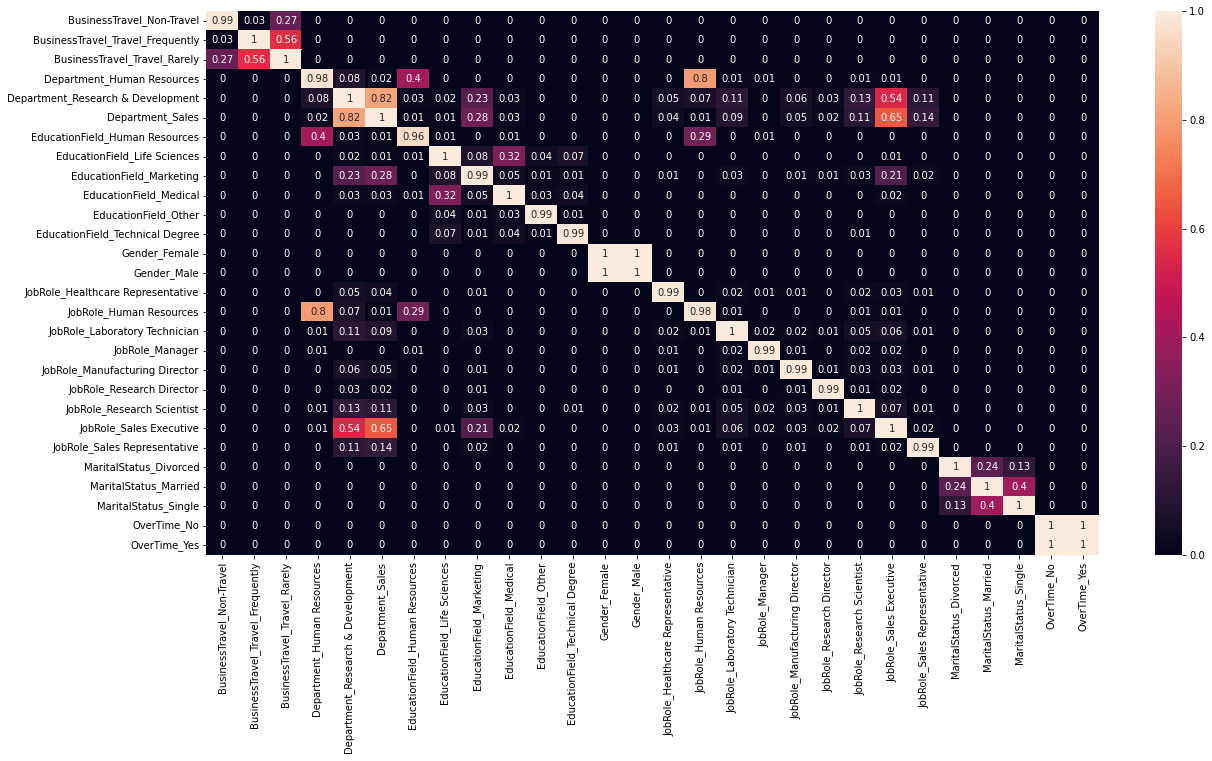

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_df_cate, annot=True);

* 계산 결과, 0.9이상의 상관계수가 나타나는 조합은 없었습니다. 따라서 범주형 데이터에서는 삭제해야 할 컬럼 조합이 없다고 판단합니다.

#### 수치형 데이터

* Pearson 상관계수를 통하여 수치형 컬럼들 사이의 상관 관계를 확인합니다.
* 두 가지 컬럼 사이에서 상관계수가 0.9 이상으로 나올 경우, 다중공선성 우려가 있으므로 둘 중 하나를 삭제합니다.

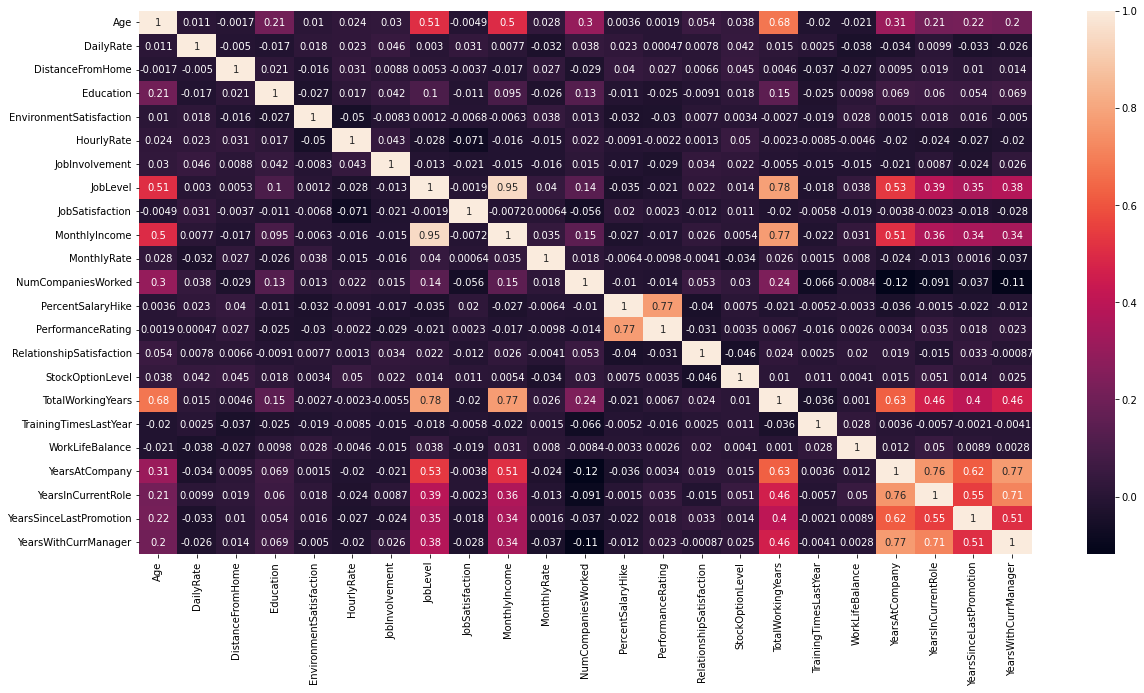

In [ ]:
corr = df_num.corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True);

* 'JobLevel'과 'MonthlyIncome' 컬럼 사이의 상관계수가 0.95로 나타났습니다. 여기에서는 'JobLevel' 컬럼을 삭제합니다.

In [ ]:
df_num = df_num.drop(['JobLevel'], axis=1)
df_num.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2


#### 데이터 병합

In [ ]:
Train = pd.concat([df_num, df_cate_encoded], axis=1)

In [ ]:
Train.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,40,3,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


### 2-7. Target Feature 불균형 문제 처리

#### 불균형 데이터 확인

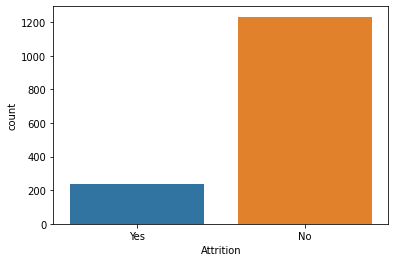

In [ ]:
sns.countplot(x='Attrition', data=df);

#### SMOTE를 이용한 오버샘플링

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition_Numeric'],
      dtype='object')

In [ ]:
target = df["Attrition_Numeric"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Train, target, test_size=0.2, random_state=13);

In [ ]:
sm = SMOTE(random_state=13)
smote_train, smote_target = sm.fit_resample(X_train, y_train)

## (3) 머신러닝 모델링

### 3-1. RandomForest 분류 모델

#### GridSearchCV를 이용한 최적의 하이퍼파라미터 탐색

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
rf_params = { 'n_estimators' : [10, 100],
           'max_depth' : [4, 8, 10, 12],
           'min_samples_leaf' : [2, 4, 8, 12],
           'max_features' : [0.1, 0.3, 0.5]
            }

# RandomForest Classifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = rf_params, cv = 3, n_jobs = -1)
grid_cv.fit(smote_train, smote_target)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 12, 'max_features': 0.1, 'min_samples_leaf': 2, 'n_estimators': 100}
최고 예측 정확도: 0.9137


In [ ]:
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 100, 
    'max_features': 0.1,
    'max_depth': 12,
    'min_samples_leaf': 2,
    'random_state' : 13,
    'verbose': 0
}

In [ ]:
rf = RandomForestClassifier(**rf_params)

#### 모델 성능 측정

In [ ]:
from sklearn.metrics import accuracy_score, log_loss, classification_report

In [ ]:
rf.fit(smote_train, smote_target)
rf_predictions = rf.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(y_test, rf_predictions)))
print("="*60)
print(classification_report(y_test, rf_predictions))

Accuracy score: 0.8741496598639455
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       248
           1       0.71      0.33      0.45        46

    accuracy                           0.87       294
   macro avg       0.80      0.65      0.69       294
weighted avg       0.86      0.87      0.85       294



### 3-2. Gradient Boosting 분류 모델

#### GridSearchCV를 이용한 최적의 하이퍼파라미터 탐색

In [ ]:
gb_params = { 'n_estimators' : [1000, 1500],
           'max_depth' : [4, 6],
           'min_samples_leaf' : [2, 4],
           'max_features' : [0.7, 0.9],
           'learning_rate' : [0.25,0.3]
            }

# RandomForest Classifier 객체 생성 후 GridSearchCV 수행
gb_clf = GradientBoostingClassifier(random_state = 0)
grid_cv = GridSearchCV(gb_clf, param_grid = gb_params, cv = 3, n_jobs = -1)
grid_cv.fit(smote_train, smote_target)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'learning_rate': 0.3, 'max_depth': 6, 'max_features': 0.9, 'min_samples_leaf': 4, 'n_estimators': 1000}
최고 예측 정확도: 0.8990


In [ ]:
# Gradient Boosting Parameters
gb_params ={
    'n_estimators': 1000,
    'max_features': 0.9,
    'learning_rate' : 0.3,
    'max_depth': 6,
    'min_samples_leaf': 4,
    'random_state' : 13,
    'verbose': 0
}

In [ ]:
gb = GradientBoostingClassifier(**gb_params)
gb.fit(smote_train, smote_target)
gb_predictions = gb.predict(X_test)

#### 모델 성능 측정

In [ ]:
print("Accuracy score: {}".format(accuracy_score(y_test, gb_predictions)))
print("="*60)
print(classification_report(y_test, gb_predictions))

Accuracy score: 0.8605442176870748
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       248
           1       0.63      0.26      0.37        46

    accuracy                           0.86       294
   macro avg       0.75      0.62      0.65       294
weighted avg       0.84      0.86      0.84       294



## (4) 결과 해석

### 4-1. RandomForest 모델링 요인 분석

In [ ]:
important_features = pd.Series(data=rf.feature_importances_, index=Train.columns.values)
important_features.sort_values(ascending=False).head()

OverTime_No                0.123444
MonthlyIncome              0.052752
StockOptionLevel           0.049040
EnvironmentSatisfaction    0.045114
JobInvolvement             0.042232
dtype: float64

RandomForest의 모델링 과정에서 영향력이 높았던 feature들을 분석했을 때, 초과 근무 여부와 월급, 스톡옵션 수준 등의 순서대로 직원 이탈 요인에 커다란 영향을 주었음이 나타났습니다.

### 4-2. Gradient Boosting 모델링 요인 분석

In [ ]:
important_features = pd.Series(data=gb.feature_importances_, index=Train.columns.values)
important_features.sort_values(ascending=False).head()

OverTime_No                0.277807
MonthlyIncome              0.086859
OverTime_Yes               0.067330
EnvironmentSatisfaction    0.056932
StockOptionLevel           0.055587
dtype: float64

Gradient Boosting 모델링 과정에서 영향력이 높았던 feature들을 분석했을 때, 초과 근무를 하지 않는 것과 월급, 초과 근무를 하는 것 등의 순서대로 직원 이탈 요인에 영향을 주었습니다. 

예측 결과를 종합했을 때, 초과근무 여부가 직원 이탈 가능성에 가장 큰 영향을 주는 요인이었습니다. 즉, 초과근무를 하지 않는 직원들은 이탈할 가능성이 높다고 볼 수 있습니다. '초과근무 없음'과 '월급'이 중요한 요인으로 나타난 점을 고려했을 때, 이 회사의 직원들은 퇴근 이후의 개인 시간보다는 초과근무 수당을 통한 급여 상승에 더 높은 가치를 부여하고 있는 것으로 보입니다.